<a href="https://colab.research.google.com/github/amartinez-se/03MIAR---Algoritmos-de-Optimizacion-2025/blob/main/03MIAR_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03MIAR - Actividad Guiada 2
Nombre: Asier Martínez San Esteban <br>
Link:   https://colab.research.google.com/github/amartinez-se/03MIAR---Algoritmos-de-Optimizacion-2025/blob/main/03MIAR_AG2.ipynb <br>

Github: https://github.com/amartinez-se/03MIAR---Algoritmos-de-Optimizacion-2025




In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

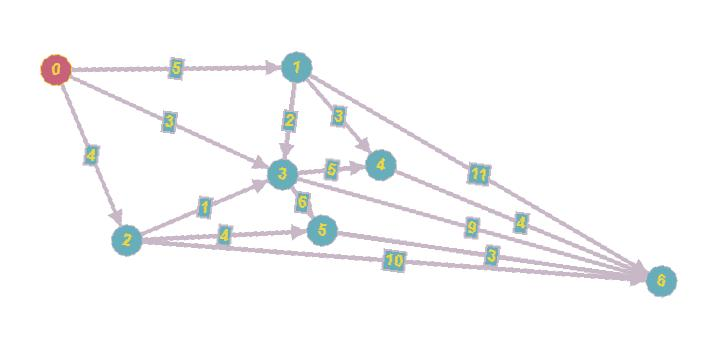

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta pasa por :")
print(calcular_ruta(RUTA, 0,6) )
print("Con valor" , PRECIOS[0][6])



La ruta pasa por :
0,2,5
Con valor 11


# 2. Problema de Asignacion de tareas
---
El problema consiste en asignar tareas de manera eficiente a los distintos agentes teniendo en cuenta el coste asociado a que cada agente realice cada tarea por medio de una matriz de costes. Cada agente debe realizar una tarea, de forma que no queden agentes sin tarea asignada ni tareas sin realizar.

1. Para modelar este problema de forma eficiente se emplea un vector de modo que la posición es el agente y el valor es el número de tarea a realizar.

        ej. (0,1,2,3) - Agente 1 realiza la tarea 1, agente dos realiza la tarea 2...

2. Siguiendo esta lógica, se crea una función *valor()* para calcular el coste de una distribución de tareas que reciba un vector con dicha distribución y teniendo en cuenta los costes asociados a cada asignación, devuelva el sumatorio total.

In [1]:
# Cálculo del valor de una solucion parcial
'''
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR
'''

def valor(S,COSTES):
  return sum([COSTES[S[i]][i] for i in range(len(S)) ])

# valor((0, 1, 2, 3  ),COSTES)

### A. Fuerza Bruta

La resolución por fuerza bruta de este problema es obvia pensando en una matriz de costos de este tamaño. Debemos probar todas las combinaciones posibles de asignación y seleccionar la mejor.

Se emplea para ello el método itertools.permutations de, que genera las $n! = 24$ combinaciones posibles (permutación sin repetición) para la asignación de las tareas.

El orden de complejidad asciende a $O(n·n!) = O(n!)$ por este motivo.

In [4]:
from itertools import permutations

def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ()

  for dist in list(permutations(range(len(COSTES)))):
    coste = valor(dist, COSTES)
    if coste < mejor_valor:
      mejor_solucion = dist
      mejor_valor = coste

  return mejor_solucion, mejor_valor

# fuerza_bruta(COSTES)

### B. Ramificación y Poda
Para implementar un algoritmo con la técnica de ramificación y poda, es necesario definir una Cota Inferior y Cota Superior para discriminar las ramas prometedoras.

Tomando la referencia visual de la matriz de costes, resulta intuitivo:

[11,12,18,40]

[14,15,13,22]

[11,17,19,23]

[17,14,20,28]

Al asignar la tarea 1 al Agente 1, el coste es 11. Por lo tanto, para la asignación del Agente 2, el CI será el coste mínimo de las tareas restantes. El CS será el coste máximo de las tareas restantes.

Para calcular la cota inferior (CI) y superior (CS):

1. Calcular coste real de las tareas ya asignadas

2. Identificar tareas pendientes por de asignar

3. Para cada agente no asignado (Agentes k a N-1), buscas el mínimo (o máximo) coste solo entre las tareas libres.



In [11]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S, COSTES):
    VALOR = valor(S, COSTES)

    # Para cada agente que falta por asignar (desde len(S) hasta el final)
    for agente in range(len(S), len(COSTES)):
        costes_disponibles = [COSTES[agente][tarea] for tarea in range(len(COSTES)) if tarea not in S]

        # Sumamos el mínimo de sus opciones disponibles (Optimista)
        if costes_disponibles:
            VALOR += min(costes_disponibles)

    return VALOR

def CS(S, COSTES):
    VALOR = valor(S, COSTES)

    # Para cada agente que falta por asignar
    for agente in range(len(S), len(COSTES)):
        costes_disponibles = [COSTES[agente][tarea] for tarea in range(len(COSTES)) if tarea not in S]

        # Sumamos el máximo de sus opciones disponibles (Pesimista)
        if costes_disponibles:
            VALOR += max(costes_disponibles)

    return VALOR

# CI((0,1,),COSTES)
# CS((0,1,),COSTES)

In [8]:
def valor(S,COSTES):
  return sum([COSTES[S[i]][i] for i in range(len(S)) ])

def CI(S, COSTES):
    VALOR = valor(S, COSTES)

    # Para cada agente que falta por asignar (desde len(S) hasta el final)
    for agente in range(len(S), len(COSTES)):
        costes_disponibles = [COSTES[agente][tarea] for tarea in range(len(COSTES)) if tarea not in S]

        # Sumamos el mínimo de sus opciones disponibles (Optimista)
        if costes_disponibles:
            VALOR += min(costes_disponibles)

    return VALOR

def CS(S, COSTES):
    VALOR = valor(S, COSTES)

    # Para cada agente que falta por asignar
    for agente in range(len(S), len(COSTES)):
        costes_disponibles = [COSTES[agente][tarea] for tarea in range(len(COSTES)) if tarea not in S]

        # Sumamos el máximo de sus opciones disponibles (Pesimista)
        if costes_disponibles:
            VALOR += max(costes_disponibles)

    return VALOR

#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES):
# Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
# Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  # print(COSTES)
  dim = len(COSTES)
  mejor_solucion = tuple( i for i in range(len(COSTES)) )
  cs = valor(mejor_solucion, COSTES)
  # print("Cota Superior:", cs)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x : x['ci']) ][0]['s']
    # print("Nodo prometedor:", nodo_prometedor)

    # Ramificacion
    # Se generan los hijos
    HIJOS = [ {'s':x['s'], 'ci':CI(x['s'], COSTES) } for x in crear_hijos(nodo_prometedor, dim) ]

    # Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == dim  ]
    if len(NODO_FINAL ) >0:
      # print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == dim  ] )
      if NODO_FINAL[0]['ci'] < cs:
        cs = NODO_FINAL[0]['ci']
        mejor_solucion = NODO_FINAL

    # Poda
    HIJOS = [x for x in HIJOS if x['ci'] < cs   ]

    # Añadimos los hijos
    NODOS.extend(HIJOS)

    # Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  return mejor_solucion, iteracion, dim

# ramificacion_y_poda(COSTES)

In [9]:
import numpy as np
import pandas as pd
import time

resultados = []
for n in range(4, 12):
    # Generar matriz aleatoria
    COSTES = np.random.rand(n, n)

    # Medir tiempo para Fuerza Bruta
    t0 = time.time()
    fb = fuerza_bruta(COSTES)
    t1 = time.time()
    t_fb = t1 - t0

    # Medir tiempo para Ramificación y Poda
    t2 = time.time()
    ryp = ramificacion_y_poda(COSTES)
    t3 = time.time()
    t_ryp = t3 - t2

    resultados.append({
        "n": n,
        "Fuerza Bruta": t_fb,
        "Ramificación y poda": t_ryp
    })

df = pd.DataFrame(resultados)
df.set_index("n", inplace=True)

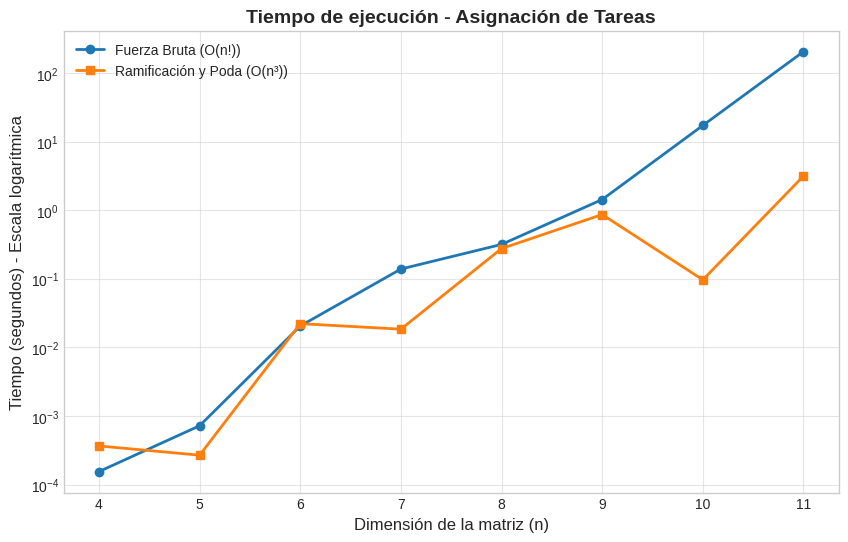

In [14]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6))

plt.plot(df.index, df['Fuerza Bruta'], marker='o', linewidth=2, label='Fuerza Bruta (O(n!))')
plt.plot(df.index, df['Ramificación y poda'], marker='s', linewidth=2, label='Ramificación y Poda (O(n³))')

plt.yscale('log') # Escala logarítmica necesaria para visualizar

plt.title('Tiempo de ejecución - Asignación de Tareas', fontsize=14, fontweight='bold')
plt.xlabel('Dimensión de la matriz (n)', fontsize=12)
plt.ylabel('Tiempo (segundos) - Escala logarítmica', fontsize=12)
plt.xticks(df.index)

plt.grid(True, ls="-", alpha=0.5)
plt.legend()

plt.show()

¿A partir de que dimensión el algoritmo por fuerza
bruta deja de ser una opción?

* En la práctica, emplenado Google Colab para n=11 ya es muy lento y con n=12 satura la RAM.

¿Hay algún valor de la dimensión a partir de la cual el
algoritmo de ramificación y poda también deja de ser
una opción válida?

* Si bien el límite es más lejano, en algoritmos de este tipo influye la caliad de las cotas inferior y superior, de modo que si son eficaces y realmente cumplen su función, suele ser plausible resolver hasta $n<40$ .

##Descenso del gradiente

In [10]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide por le metodo del descenso del gradiente : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [11]:
#Definimos la funcion(f) y el gradiente(df)
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

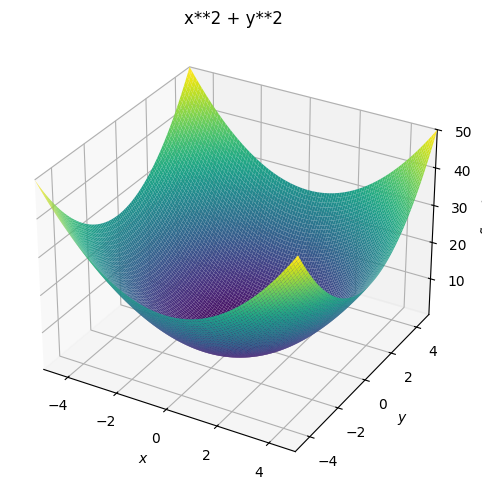

In [18]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(5,5))

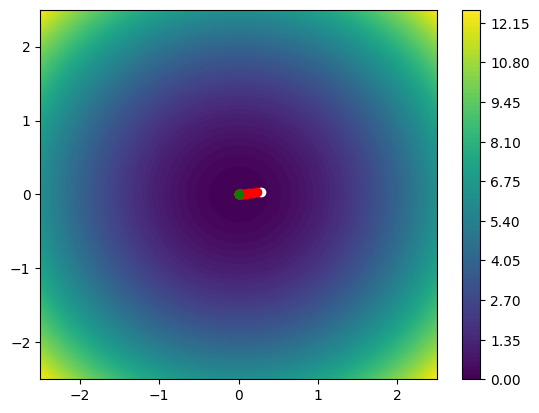

Solucion: [4.062529505476335e-06, 5.171072659381417e-07] 1.6771545907351818e-11


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
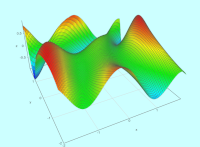


In [16]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


In [15]:
def grad_f(punto):
  h = 0.000001
  T = np.copy(punto)
  grad = np.zeros(2)
  for it, th in enumerate(punto):
    T[it] = th + h
    grad[it] = (f(T) - f(punto))/h
    T[it] = th
  return grad

In [17]:
def descenso_gradiente(grad_f, x0, alpha, tol, max_iter):
    x = x0.copy()  # copio el inicial para no modificar el original
    conv = False

    for i in range(max_iter):
        grad = grad_f(x)
        # si el gradiente ya es pequeño, no hace falta seguir
        if np.linalg.norm(grad) < tol:
          conv = True
          break

        # actualización estándar del método
        x = x - alpha * grad
    if not conv:
        print(f"Se alcanzó el máximo de {max_iter} iteraciones sin converger.")
        return None
    else:
        print(f"Convergencia alcanzada en la iteración {i}.")
    return x

In [ ]:
# Crear rangos para los ejes
x = np.linspace(-4, 2, 100)
y = np.linspace(-2, 3, 100)

# Crear la malla (X, Y son matrices 2D)
X, Y = np.meshgrid(x, y)

# Evaluar la función en cada punto de la malla
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = g(X[i,j], Y[i,j])

fig = plt.figure(figsize=(14, 6))

# Gráfico 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_title('Superficie 3D de g(x, y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Marcar los puntos críticos calculados analíticamente
ax1.plot(0, 0, 'ro', label='Punto de Silla (0,0)')
ax1.plot(-2.25, 1.5, 'bo', label='Mínimo (-2.25, 1.5)')
ax1.legend()

plt.tight_layout()
plt.show()

##Problema de Autobuses por Fuerza Bruta

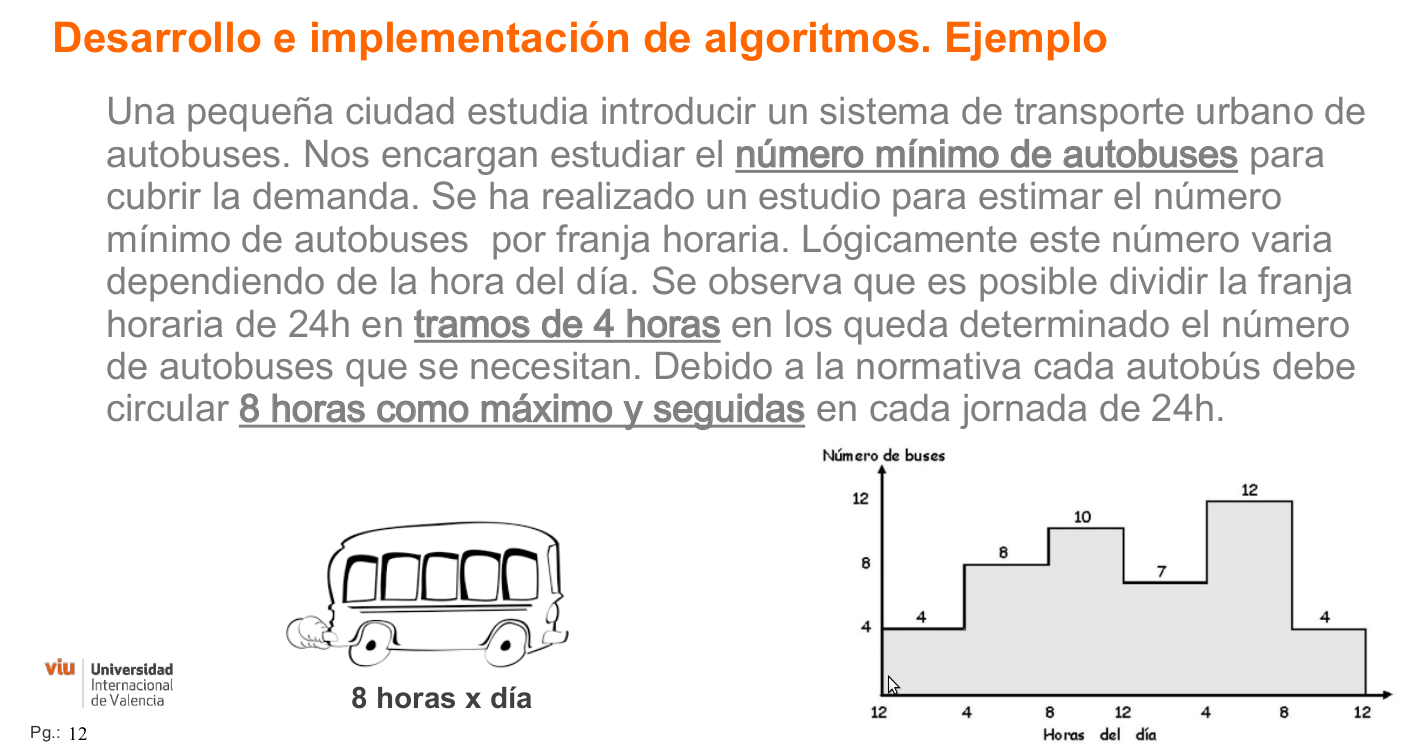

In [ ]:
###################################################
# Ximo Sanz Tornero.
###################################################
from itertools import product

# Paso 1: Inicializamos los datos
# Demanda mínima de autobuses por tramo
demanda = [4, 8, 10, 7, 12, 4]  # d[0], d[1], ..., d[5]
tramos = len(demanda)  # Número de tramos (6 en este caso)


#Posible Solucion
x = [4,5,6,7,8,9]

for t in range(tramos):
    # Calculamos el número actual de autobuses que están cubriendo el tramo t
    cobertura_actual = x[t] + x[t - 1]  # Autobuses en t y t-1 (cíclico)

    # Si la cobertura actual es menor que la demanda, añadimos autobuses en t
    if cobertura_actual < demanda[t]:
        # Añadimos los autobuses necesarios en el tramo t
        x[t] += demanda[t] - cobertura_actual

#Función objetivo
f_objetivo = sum(x)


# Se crean funciones tanto para verificar posibles soluciones como para obtener el valor de la función objetivo de la solución
# Función objetivo: suma de todos los x[i]
def funcion_objetivo(solucion):
    return sum(solucion)

# Verificación de restricciones
def verifica_restricciones(solucion):
    for t in range(tramos):
        # Se calcula el número actual de autobuses que están cubriendo el tramo t
        cobertura_actual = solucion[t] + solucion[t - 1]  # Cíclico
        if cobertura_actual < demanda[t]:
            return False
    return True


# Se realiza el algoritmo por fuerza bruta con todas las posibles combinaciones de valores que tenemos en funcion de la variable demanda
# Generación del espacio de soluciones
# Para ver mejor el funcionamiento, ejecutar: for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)
espacio_soluciones = product(*(range(d + 1) for d in demanda))

# Búsqueda de la mejor solución
mejor_valor_objetivo = float('inf')
mejores_soluciones = []

for solucion in espacio_soluciones:
    if verifica_restricciones(solucion):
        valor_objetivo = funcion_objetivo(solucion)
        if valor_objetivo < mejor_valor_objetivo:
            mejor_valor_objetivo = valor_objetivo
            mejores_soluciones = [solucion]
        elif valor_objetivo == mejor_valor_objetivo:
            mejores_soluciones.append(solucion)  # Agrega soluciones con el mismo valor

# Resultado
print("Mejores soluciones:")
for solucion in mejores_soluciones:
    print(solucion)
print("Valor mínimo de la función objetivo:", mejor_valor_objetivo)



Mejores soluciones:
(0, 8, 2, 5, 7, 4)
(0, 8, 2, 6, 6, 4)
(0, 8, 2, 7, 5, 4)
(1, 7, 3, 4, 8, 3)
(1, 7, 3, 5, 7, 3)
(1, 7, 3, 6, 6, 3)
(1, 7, 3, 7, 5, 3)
(1, 8, 2, 5, 7, 3)
(1, 8, 2, 6, 6, 3)
(1, 8, 2, 7, 5, 3)
(2, 6, 4, 3, 9, 2)
(2, 6, 4, 4, 8, 2)
(2, 6, 4, 5, 7, 2)
(2, 6, 4, 6, 6, 2)
(2, 6, 4, 7, 5, 2)
(2, 7, 3, 4, 8, 2)
(2, 7, 3, 5, 7, 2)
(2, 7, 3, 6, 6, 2)
(2, 7, 3, 7, 5, 2)
(2, 8, 2, 5, 7, 2)
(2, 8, 2, 6, 6, 2)
(2, 8, 2, 7, 5, 2)
(3, 5, 5, 2, 10, 1)
(3, 5, 5, 3, 9, 1)
(3, 5, 5, 4, 8, 1)
(3, 5, 5, 5, 7, 1)
(3, 5, 5, 6, 6, 1)
(3, 5, 5, 7, 5, 1)
(3, 6, 4, 3, 9, 1)
(3, 6, 4, 4, 8, 1)
(3, 6, 4, 5, 7, 1)
(3, 6, 4, 6, 6, 1)
(3, 6, 4, 7, 5, 1)
(3, 7, 3, 4, 8, 1)
(3, 7, 3, 5, 7, 1)
(3, 7, 3, 6, 6, 1)
(3, 7, 3, 7, 5, 1)
(3, 8, 2, 5, 7, 1)
(3, 8, 2, 6, 6, 1)
(3, 8, 2, 7, 5, 1)
(4, 4, 6, 1, 11, 0)
(4, 4, 6, 2, 10, 0)
(4, 4, 6, 3, 9, 0)
(4, 4, 6, 4, 8, 0)
(4, 4, 6, 5, 7, 0)
(4, 4, 6, 6, 6, 0)
(4, 4, 6, 7, 5, 0)
(4, 5, 5, 2, 10, 0)
(4, 5, 5, 3, 9, 0)
(4, 5, 5, 4, 8, 0)
(4, 5, 5, 5, 7, 0)
(4, 5, 

In [ ]:
for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
